## 19. Causal Inference

In this chapter we discuss causation.  Roughly speaking "$X$ causes $Y$" means that changing the value of $X$ will change the distribution of $Y$.  When $X$ causes $Y$, $X$ and $Y$ will be associated but the reverse is not, in general, true.

We will consider two frameworks for discussing causation.  The first uses notation of **counterfactual** random variables.  The second, used in the next chapter, uses **directed acyclic graphs**.

### 19.1 The Counterfactual Model

Suppose that $X$ is a binary treatment variable where $X = 1$ means "treated" and $X = 0$ means "not treated".

Let $Y$ be some outcome variable such as the presence or absence of disease.  To distinguish the statement "$X$ is associated with $Y$" from the statement "$X$ causes $Y$" we need to enrich our probabilistic vocabulary.  We will decompose the response $Y$ into a more fine-grained object.

We introduce two new random variables $(C_0, C_1)$ called **potential outcomes** with the following interpretation: $C_0$ is the outcome if the subject is not treated ($X = 0$) and $C_1$ is the outcome if the subject is treated ($X = 1$).  Then,

$$ Y = \begin{cases}
C_0 & \text{if } X = 0 \\
C_1 & \text{if } X = 1
\end{cases}$$

We can express the relationship between $Y$ and $(C_0, C_1)$ more succintly by

$$ Y = C_X $$

This equation is called the **consistency relationship**.

Here is a toy dataset to make the relationship clear:

$$
\begin{array}{cccc}
X & Y & C_0 & C_1 \\
\hline
0 & 4 & 4 & * \\
0 & 7 & 7 & * \\
0 & 2 & 2 & * \\
0 & 8 & 8 & * \\
\hline
1 & 3 & * & 3 \\
1 & 5 & * & 5 \\
1 & 8 & * & 8 \\
1 & 9 & * & 9
\end{array}
$$

The asterisks denote unobserved values.  When $X = 0$ we don't observe $C_1$ in which case we say that $C_1$ is a **counterfactual** since it is the outcome you would have had if, counter to the fact, you had been treated ($X = 1$).  Similarly, when $X = 1$ we don't observe $C_0$ and we say that $C_0$ is counterfactual.

Notice that there are four types of subjects:

$$
\begin{array}{lcc}
\text{Type} & C_0 & C_1 \\
\hline
\text{Survivors}       & 1 & 1 \\
\text{Responders}      & 0 & 1 \\
\text{Anti-responders} & 1 & 0 \\
\text{Doomed}          & 0 & 0
\end{array}
$$

Think of all of the potential outcomes $(C_0, C_1)$ as hidden variables that contain all the relevant information about the subject.

Define the **average causal effect** or **average treatment effect** to be

$$ \theta = \mathbb{E}(C_1) - \mathbb{E}(C_0) $$

The parameter $\theta$ has the following interpretation:  $\theta$ is the mean if everyone were treated ($X = 1$) minus the mean if everyone were not treated ($X = 0$).  There are other ways of measuring the causal effect.  For example, if $C_0$ and $C_1$ are binary, we define the **causal odds ratio**

$$ \frac{\mathbb{P}(C_1 = 1)}{\mathbb{P}(C_1 = 0)} \div \frac{\mathbb{P}(C_0 = 1)}{\mathbb{P}(C_0 = 0)}$$

and the **causal relative risk**

$$ \frac{\mathbb{P}(C_1 = 1)}{\mathbb{P}(C_0 = 1)} $$

The main ideas will be the same whatever causal effect we use.  For simplicity, we shall work with the average causal effect $\theta$.

Define the **association** to be

$$ \alpha = \mathbb{E}(Y | X = 1) - \mathbb{E}(Y | X = 0)$$

Again we could use the odds ratio or other summaries if we wish.

**Theorem 19.1 (Association is not equal to Causation)**.  In general, $\theta \neq \alpha$.

**Theorem 19.3**.  Suppose we randomly assign subjects to treatment and that $\mathbb{P}(X = 0) > 0$ and $\mathbb{P}(X = 1) > 0$.  Then $\alpha = \theta$.  Hence, any consistent estimator of $\alpha$ is a consistent estimator of $\theta$.  In particular, a consistent estimator is

$$ \hat{\theta} = \hat{\mathbb{E}}(Y | X = 1) - \hat{\mathbb{E}}(Y | X = 0) = \overline{Y}_1 - \overline{Y}_0 $$

is a consistent estimator of $\theta$, where

$$
\begin{array}{ll}
\hat{Y}_1 = \frac{1}{n_1} \sum_{i: X_i = 1} Y_i
&
\hat{Y}_0 = \frac{1}{n_0} \sum_{i: X_i = 0} Y_i \\
n_1 = \sum_{i=1}^n X_i
&
n_0 = \sum_{i=1}^n (1 - X_i)
\end{array}
$$

**Proof**.  Since $X$ is randomly assigned, $X$ is independent of $(C_0, C_1)$.  Hence,

$$
\begin{align}
\theta &= \mathbb{E}(C_1) - \mathbb{E}(C_0) \\
&= \mathbb{E}(C_1 | X = 1) - \mathbb{E}(C_0 | X = 0) \\
&= \mathbb{E}(Y | X = 1) - \mathbb{E}(Y | X = 0) \\
&= \alpha
\end{align}
$$

The consistency follows from the law of large numbers.

If $Z$ is a covariate, we define the **conditional causal effect** by

$$ \theta_z = \mathbb{E}(C_1 | Z = z) - \mathbb{E}(C_0 | Z = z) $$

In a randomized experiment, $\theta_z = \mathbb{E}(Y | X = 1, Z = z) - \mathbb{E}(Y | X = 0, Z = z)$ and we can estimate the conditional causal effect using appropriate sample averages.

**Summary**

- Random variables: $(C_0, C_1, X, Y)$
- Consistency relationship: $Y = C_X$
- Causal Effect: $\theta = \mathbb{E}(C_1) - \mathbb{E}(C_0)$
- Association: $\alpha = \mathbb{E}(Y | X = 1) - \mathbb{E}(Y | X = 0)$
- Random Assignment:  $(C_0, C_1) \text{ ⫫ } X \Longrightarrow \theta = \alpha$

### 19.2 Beyond Binary Treatments

Suppose that $X \in \mathcal{X}$. The counterfactual vector $(C_0, C_1)$ now becomes the **counterfactual process**

$$ \{ C(x) : x \in \mathcal{X} \} $$

where $C(x)$ is the outcome a subject would have if subjected to treatment $x$.  The observed response is given by the consistency relation

$$ Y \equiv C(X) $$

The **causal regression function** is 

$$ \theta(x) = \mathbb{E}(C(x)) $$

The regression function, which measures association, is $r(x) = \mathbb{E}(Y | X = x)$.

**Theorem 19.4**.  In general, $\theta(x) \neq r(x)$. However, when $X$ is randomly assigned, $\theta(x) = r(x)$.

### 19.3 Observational Studies and Confounding

A study in which treatment (or exposure) is not randomly assigned is called an **observational study**. In these studies, subjects select their own value of the exposure $X$.  Association and causation could be quite different.  This discrepancy occurs in non-randomized studies because the potential outcome $C$ is not independent of treatment $X$.

However, suppose we could find groupings of subjects such that, within each group, $X$ and $\{ C(x) : x \in \mathcal{X} \}$ are independent.  This would happen if the subjects are very similar within groups.  For example, suppose we find people who are very similar in age, gender, educational background and ethnic background.  Among those people we might feel it is reasonable to assume that the choice of $X$ is essentially random.  These other variables are called **confounding variables**.  If we denote these variables collectively as $Z$, then we can express this idea by saying that

$$ \{ C(x) : x \in \mathcal{X} \} \text{ ⫫ } X | Z$$

If this holds and we observe $Z$ then we say there is **no unmeasured confounding**.

**Theorem 19.17**.  Suppose that $ \{ C(x) : x \in \mathcal{X} \} \text{ ⫫ } X | Z$.  Then,

$$ \theta(x) = \int \mathbb{E}(Y | X = x, Z = z) d F_Z(z) dz $$

If $\hat{r}(x, z)$ is a consistent estimate of the regression function $\mathbb{E}(Y | X = x, Z = z)$, then a consistent estimate of $\theta(x)$ is

$$ \hat{\theta}(x) = \frac{1}{n} \sum_{i=1}^n \hat{r}(x, Z_i) $$

In particular, if $r(x, z) = \beta_0 + \beta_1 x + \beta_2 z$ is linear, then a consistent estimate of $\theta(x)$ is

$$ \hat{\theta}(x) = \hat{\beta}_0 + \hat{\beta}_2 x + \hat{\beta}_2 \overline{Z}_n $$

where $(\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2)$ are the least squares estimators.

Epidemiologists call this definition of $\theta(x)$ the **adjusted treatment effect**.  The process of computing adjusted treatment effects is called **adjusting (or controlling) for confounding**.  The selection of what confounders $Z$ to measure and control for requires scientic insight.  Even after adjusting for confounders, we cannot be sure that there are not other confounding variables that we missed.  This is why observational studies must be treated with healthy skepticism.  Results from observational studies start to become believable when: (i) the results are replicated in many studies, (ii) each of the studies controlled for plausible confounding variables, (iii) there is a plausible scientic explanation for the existence of a causal relationship.

A good example is smoking and cancer.  Numerous studies have shown a relationship between smoking and cancer even after adjusting for many confouding variables.  Moreover, in laboratory studies, smoking has been shown to damage lung cells.  Finally, a causal link between smoking and cancer has been found in randomized animal studies.  It is this collection of evidence over many years that makes this a convincing case.  One single observational study is not, by itself, strong evidence.  Remember that when you read the newspaper.

### 19.4 Simpson's Paradox

Let $X$ be a binary treatment variable, $Y$ a binary outcome and $Z$ a third binary variable such as gender.  Suppose the joint distribution of $X$, $Y$, $Z$ is

$$
\begin{array}{ccccc}
       & Y = 1 & Y = 0 & Y = 1 & Y = 0 \\
\hline
X = 1 & .1500 & .2250 & .1000 & .0250 \\
X = 0 & .0375 & .0875 & .2625 & .1125 \\
\hline
      & Z = 1 & & Z = 0 &
\end{array}
$$

The marginal distribution for $(X, Y)$ is

$$
\begin{array}{c|cc|c}
       & Y = 1 & Y = 0 & \\
\hline
X = 1 & .25 & .25 & .50 \\
X = 0 & .30 & .20 & .50 \\
\hline
      & .55 & .45 & 1
\end{array}
$$

Now,

$$ 
\begin{align}
\mathbb{P}(Y = 1 | X = 1) - \mathbb{P}(Y = 1 | X = 0) 
&= \frac{\mathbb{P}(Y = 1, X = 1)}{\mathbb{P}(X = 1)} - \frac{\mathbb{P}(Y = 1, X = 0)}{\mathbb{P}(X = 0)} \\
&= \frac{.25}{.50} - \frac{.30}{.50} \\
&= -0.1
\end{align}
$$

We might naively interpret this to mean that the treatment is bad for you since $\mathbb{P}(Y = 1 | X = 1) < \mathbb{P}(Y = 1 | X = 0) $.  Furthermore, among men ($Z = 1$),

$$ 
\begin{align}
\mathbb{P}(Y = 1 | X = 1, Z = 1) &- \mathbb{P}(Y = 1 | X = 0, Z = 1) \\
&= \frac{\mathbb{P}(Y = 1, X = 1, Z = 1)}{\mathbb{P}(X = 1, Z = 1)} - \frac{\mathbb{P}(Y = 1, X = 0, Z = 1)}{\mathbb{P}(X = 0, Z = 1)} \\
&= \frac{.15}{.3570} - \frac{.0375}{.1250} \\
&= 0.1
\end{align}
$$

Also, among women ($Z = 0$),

$$ 
\begin{align}
\mathbb{P}(Y = 1 | X = 1, Z = 0) &- \mathbb{P}(Y = 1 | X = 0, Z = 0) \\
&= \frac{\mathbb{P}(Y = 1, X = 1, Z = 0)}{\mathbb{P}(X = 1, Z = 0)} - \frac{\mathbb{P}(Y = 1, X = 0, Z = 0)}{\mathbb{P}(X = 0, Z = 0)} \\
&= \frac{.1}{.1250} - \frac{.2625}{.3750} \\
&= 0.1
\end{align}
$$

To summarize, it seems we have:

$$
\begin{array}{ll}
\text{Mathematical Statement} & \text{English Statement?} \\
\hline
\mathbb{P}(Y = 1 | X = 1) < \mathbb{P}(Y = 1 | X = 0) & \text{treatment is harmful} \\
\mathbb{P}(Y = 1 | X = 1, Z = 1) > \mathbb{P}(Y = 1 | X = 0, Z = 1) & \text{treatment is beneficial to men} \\
\mathbb{P}(Y = 1 | X = 1, Z = 0) > \mathbb{P}(Y = 1 | X = 0, Z = 0) & \text{treatment is beneficial to women}
\end{array}
$$

Clearly something is amiss.  We can't have a treatment that is good for men, good for women, but bad overall.  The problem is with the set of English statements.  **The inequality $\mathbb{P}(Y = 1 | X = 1) < \mathbb{P}(Y = 1 | X = 0)$ does not mean that the treatment is harmful**.

The phrase "treatment is harmful" should be written as $\mathbb{P}(C_1 = 1) < \mathbb{P}(C_0 = 1)$.  The phrase "treatment is harmful for men" should be written $\mathbb{P}(C_1 = 1 | Z = 1) < \mathbb{P}(C_0 = 1 | Z = 0)$.  The three mathematical statements in the table are not contradictory, but the english statements are.

Let us now show that a real Simpson's paradox cannot happen, that is, there cannot be a treatment that is beneficial for men and women but harmful overall.  Suppose treatment is beneficial for each subgroup.  Then

$$ \mathbb{P}(C_1 = 1 | Z = z) > \mathbb{P}(C_0 = 1 | Z = z) $$

for all $z$.  It then follows that

$$\mathbb{P}(C_1 = 1) = \sum_z \mathbb{P}(C_1 = 1 | Z = z) \mathbb{P}(Z = z) > \sum_z \mathbb{P}(C_1 = 0 | Z = z) \mathbb{P}(Z = z) = \mathbb{P}(C_1 = 0) $$

so $\mathbb{P}(C_1 = 1) > \mathbb{P}(C_1 = 0)$ and the treatment is overall beneficial.

### 19.6 Exercises

**Exercise 19.6.1**.  Create an example like Example 19.2 in which $\alpha > 0$ and $\theta < 0$.

Example:

$$
\begin{array}{cccc}
X & Y & C_0 & C_1 \\
\hline
0 & 0 & 0 & 0* \\
0 & 0 & 0 & 0* \\
0 & 0 & 0 & 0* \\
0 & 0 & 0 & 0* \\
\hline
1 & 1 & 1* & 1 \\
1 & 1 & 1* & 1 \\
1 & 1 & 1* & 1 \\
1 & 1 & 1* & 1
\end{array}
$$

$$ 
\begin{align}
\theta &= \mathbb{E}(C_1) - \mathbb{E}(C_0) = 1/2 - 1/2 = 0 \\
\alpha &= \mathbb{E}(Y | X = 1) - \mathbb{E}(Y | X = 0) = 1 - 0 = 1
\end{align}
$$

**Solution**. Consider the following data for the whole population:

$$
\begin{array}{cccc}
X & Y & C_0 & C_1 \\
\hline
0 & 0 & 0 & 0* \\
0 & 1 & 1 & 0* \\
\hline
1 & 1 & 1* & 1
\end{array}
$$

$$ 
\begin{align}
\theta &= \mathbb{E}(C_1) - \mathbb{E}(C_0) = 1/3 - 2/3 = -1/3 \\
\alpha &= \mathbb{E}(Y | X = 1) - \mathbb{E}(Y | X = 0) = 1 - 1/2 = 1/2
\end{align}
$$

**Exercise 19.6.2**.  Prove Theorem 19.4.

In general, $\theta(x) \neq r(x)$. However, when $X$ is randomly assigned, $\theta(x) = r(x)$.

**Solution**.  We have:

$$
\begin{align}
\theta(x) &= \mathbb{E}(C(x)) \\
r(x) &= \mathbb{E}(Y | X = x)
\end{align}
$$

We can show the inequality by providing an example where it holds:  

Let $C_i(x) \equiv i$ for each population sample $i$ be constant.  Then $\theta(x) = \frac{1}{n} \sum_i C_i(x) = n (n+1) / 2$ is a constant that does not depend on $x$.  On the other hand, if we have samples $(X_i, Y_i) = (i, i)$, then $r(x) = x$, which does depend on $x$, and the inequality holds.

Now, when $X$ is randomly assigned, we have:

$$
\theta(x) = \mathbb{E}(C(x)) = \mathbb{E}(C(x) | X = x) = \mathbb{E}(Y | X = x) = r(x)
$$

where $\mathbb{E}(C(x)) = \mathbb{E}(C(x) | X = x)$ since $X \text{ ⫫  } \{ C(x) : x \in \mathcal{X} \}$ (i.e. $X$ is randomly assigned) and $\mathbb{E}(C(x) | X = x) = \mathbb{E}(Y | X = x)$ since $Y \equiv C(X)$ by definition.

Note that this demonstration is analogous to the demonstration for the binary case in Theorem 19.3.

**Exercise 19.6.3**.  Suppose you are given data $(X_1, Y_1), \dots, (X_n, Y_n)$ from an observational study, where $X_i \in \{0, 1\}$ and $Y_i \in \{0, 1\}$.  Although it is not possible to estimate the causal effect $\theta$, it is possible to put bounds on $\theta$.  Find upper and lower bounds on $\theta$ that can be consistently estimated from the data.  Show that the bounds have width 1.  

Hint:  note that $\mathbb{E}(C_1) = \mathbb{E}(C_1 | X = 1) \mathbb{P}(X = 1) + \mathbb{E}(C_1 | X = 0) \mathbb{P}(X = 0)$.

**Solution**.  We have:

$$
\begin{align}
\theta &= \mathbb{E}(C_1) - \mathbb{E}(C_0) \\
&= \mathbb{E}(C_1 | X = 1) \mathbb{P}(X = 1) + \mathbb{E}(C_1 | X = 0) \mathbb{P}(X = 0)
 - \Big( \mathbb{E}(C_0 | X = 1) \mathbb{P}(X = 1) + \mathbb{E}(C_0 | X = 0) \mathbb{P}(X = 0) \Big) \\
&= \mathbb{E}(C_1 | X = 1) \mathbb{P}(X = 1) - \mathbb{E}(C_0 | X = 0) \mathbb{P}(X = 0)
 + \mathbb{E}(C_1 | X = 0) \mathbb{P}(X = 0) - \mathbb{E}(C_0 | X = 1) \mathbb{P}(X = 1) \\
&= \Big( \mathbb{E}(Y | X = 1) \mathbb{P}(X = 1) - \mathbb{E}(Y | X = 0) \mathbb{P}(X = 0) \Big)
 + \Big( \mathbb{E}(C_1 | X = 0) \mathbb{P}(X = 0) - \mathbb{E}(C_0 | X = 1) \mathbb{P}(X = 1) \Big)
\end{align}
$$

The first terms in this expression can be estimated: $Y \equiv C_X$, so $\mathbb{E}(C_x | X = x) = \mathbb{E}(Y | X = x)$.  On the other hand, the unobserved terms $\mathbb{E}(C_1 | X = 0)$ and $\mathbb{E}(C_0 | X = 1)$ cannot be estimated from data.  Since $C_j \in \{0, 1\}$, however, we can bound these expected values to the interval $[0, 1]$.  This means that:

$$ 0 \cdot \mathbb{P}(X = 0) - 1 \cdot \mathbb{P}(X = 1) \leq \mathbb{E}(C_1 | X = 0) \mathbb{P}(X = 0) - \mathbb{E}(C_0 | X = 1) \mathbb{P}(X = 1) \leq 1 \cdot \mathbb{P}(X = 0) - 0 \cdot \mathbb{P}(X = 1)$$

or, simplifying,

$$ - \mathbb{P}(X = 1) \leq \mathbb{E}(C_1 | X = 0) \mathbb{P}(X = 0) - \mathbb{E}(C_0 | X = 1) \mathbb{P}(X = 1) \leq \mathbb{P}(X = 0) $$

which is a bound of width 1 (since $\mathbb{P}(X = 0) + \mathbb{P}(X = 1) = 1$).

Therefore, we have

$$ \Big( \mathbb{E}(Y | X = 1) \mathbb{P}(X = 1) - \mathbb{E}(Y | X = 0) \mathbb{P}(X = 0) \Big) - \mathbb{P}(X = 1)
 \leq \theta \leq
 \Big( \mathbb{E}(Y | X = 1) \mathbb{P}(X = 1) - \mathbb{E}(Y | X = 0) \mathbb{P}(X = 0) \Big) + \mathbb{P}(X = 0)
$$

Given $Y$ is binary, we have:

$$ \mathbb{E}(Y | X = 1) \mathbb{P}(X = 1) =  \mathbb{P}(Y = 1 | X = 1) \mathbb{P}(X = 1) =  \mathbb{P}(X = 1, Y = 1) \\
\mathbb{E}(Y | X = 0) \mathbb{P}(X = 0) =  \mathbb{P}(Y = 0 | X = 0) \mathbb{P}(X = 0) =  \mathbb{P}(X = 0, Y = 0) $$

and so the estimates for the bounds are:

$$
\begin{align}
\Big( \mathbb{E}(Y | X = 1) \mathbb{P}(X = 1) - \mathbb{E}(Y | X = 0) \mathbb{P}(X = 0) \Big) - \mathbb{P}(X = 1)
&\approx \frac{1}{n} \sum_{i = 1}^n \left( I(X_i = 1, Y_i = 1) - I(X_i = 0, Y_i = 0) - I(X_i = 1)\right) \\
\Big( \mathbb{E}(Y | X = 1) \mathbb{P}(X = 1) - \mathbb{E}(Y | X = 0) \mathbb{P}(X = 0) \Big) + \mathbb{P}(X = 0)
&\approx \frac{1}{n} \sum_{i = 1}^n \left( I(X_i = 1, Y_i = 1) - I(X_i = 0, Y_i = 0) + I(X_i = 0)\right)
\end{align}
$$

**Exercise 19.6.4**.  Suppose that $X \in \mathbb{R}$ and that, for each subject $i$, $C_i(x) = \beta_{1i}x$.  Each subject has their own slope $\beta_{1i}$.  Construct a joint distribution on $(\beta_1, X)$ such that $\mathbb{P}(\beta_1 > 0) = 1$ but $\mathbb{E}(Y | X = x)$ is a decreasing function of $x$, where $Y = C(X)$.  Interpret.

Hint: Write $f(\beta_1, x) = f(\beta_1)f(x | \beta_1)$.  Choose $f(x | \beta_1)$ so that when $\beta_1$ is large, $x$ is small and when $\beta_1$ is small $x$ is large.

**Solution**.

Let's construct a very simple joint distribution to develop this intuition.  Let $\beta_1$ have a probability mass function with mass 1/2 on values 1/2 and 2.  Now let's pick points $(X, \beta_1)$ with the following mass distribution:

$$\begin{array}{c|cc}
\mathbb{P} & X = 1 & X = 2 \\
\hline
\beta_1 = 1/2 & 0 & 0.5 \\
\beta_1 = 2 & 0.5 & 0 \\
\end{array}
\quad \text{or} \quad
\begin{array}{c|cc}
\mathbb{P} & X = 1 & X = 2 \\
\hline
Y = 1 & 0 & 0.5 \\
Y = 2 & 0.5 & 0 \\
\end{array}
$$

For this toy example, $\mathbb{E}(Y | X = x) = 3 - x$ is decreasing in $x$.

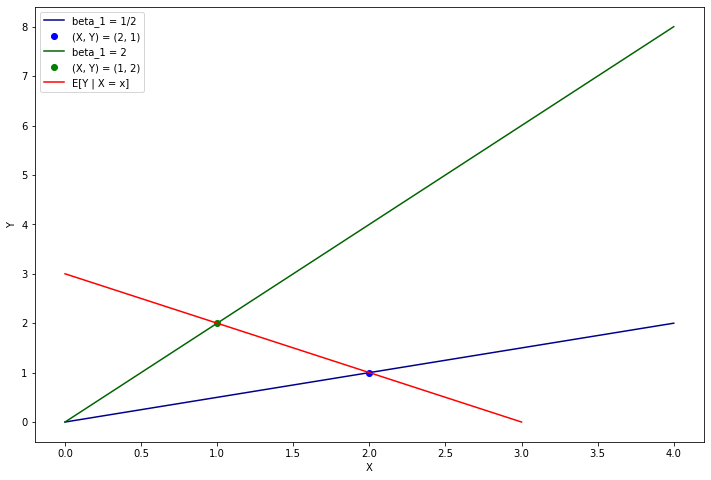

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.plot([0, 4], [0, 2], color='darkblue', label='beta_1 = 1/2')
plt.plot(2, 1, 'go', color='blue', label='(X, Y) = (2, 1)')
plt.plot([0, 4], [0, 8], color='darkgreen', label='beta_1 = 2')
plt.plot(1, 2, 'go', color='green', label='(X, Y) = (1, 2)')
plt.plot([0, 3], [3, 0], color='red', label='E[Y | X = x]')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Generally, what we want to do to make $r(x) = \mathbb{E}(Y | X = x)$ is to ensure the distribution generates points that have a lower $X$ for a larger $Y$, by selecting a smaller value of $X$ when $Y$ is larger.

Let's choose a joint probability distribution as $\mathbb{P}(\beta_1, x) = \mathbb{P}(\beta_1) \mathbb{P}(x | \beta_1)$, and let's choose distribution of $x | \beta_1$ as a discrete probability mass function with all its mass on a single value:

$$
\mathbb{P}(x | \beta_1) = \begin{cases}
1 & \text{if } x + y = 1, \text{ where } y = \beta_1 x\\
0 & \text{otherwise}
\end{cases}
$$

Now, by construction all points $(X, Y)$ lie on the line $X + Y = 1$, so $\mathbb{E}(X + Y) = 1$ and $\mathbb{E}(Y | X = x) = 1 - x$, which is decreasing in $x$.